In [232]:
import numpy as np
import matplotlib.pyplot as plt
import ast

In [233]:
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
print(len(voltages))
# Load the 2D array from the CSV file
loaded_arr = np.loadtxt("data/raw_data.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
real_values = loaded_arr.reshape((312, 2, 144))

312


In [234]:
print(real_values[0][0])
print(real_values[0][1])

[1537.72277008 1537.7366205  1537.73939058 1537.74216066 1537.74493075
 1537.74770083 1537.75047091 1537.753241   1537.75601108 1537.75878116
 1537.76155125 1537.76432133 1537.76709141 1537.7698615  1537.77263158
 1537.77540166 1537.77817175 1537.78094183 1537.78371191 1537.78648199
 1537.78925208 1537.79202216 1537.80864266 1537.81141274 1537.81141274
 1537.82249307 1537.82249307 1537.82526316 1537.82803324 1537.83080332
 1537.83357341 1537.83634349 1537.83911357 1537.84188366 1537.84465374
 1537.84742382 1537.85019391 1537.85296399 1537.85573407 1537.85850416
 1537.87235457 1537.98592798 1537.98592798 1537.98869806 1537.98869806
 1537.99146814 1537.99700831 1538.01639889 1538.01916898 1538.02193906
 1538.02193906 1538.09950139 1538.10227147 1538.10504155 1538.11612188
 1538.13551247 1538.14936288 1538.15213296 1538.15490305 1538.15767313
 1538.1632133  1538.19922438 1538.19922438 1538.21861496 1538.21861496
 1538.29894737 1538.3266482  1538.36542936 1538.36542936 1538.36542936
 1538.

In [235]:
masked_values = np.ma.array(real_values)
masked_values = np.ma.masked_where(masked_values == 0.0, masked_values) #masks all values that are 0
print(masked_values.shape)
print(masked_values)

(312, 2, 144)
[[[1537.7227700831024 1537.7366204986145 1537.7393905817169 ... -- -- --]
  [-15.282051282051514 -15.378205128205362 -15.34615384615408 ... -- --
   --]]

 [[1537.7227700831024 1537.7366204986145 1537.7393905817169 ... -- -- --]
  [-15.282051282051514 -15.378205128205362 -15.34615384615408 ... -- --
   --]]

 [[1537.7227700831024 1537.7366204986145 1537.7393905817169 ... -- -- --]
  [-15.282051282051514 -15.378205128205362 -15.34615384615408 ... -- --
   --]]

 ...

 [[1537.7366204986145 1537.7892520775601 1537.7920221606626 ... -- -- --]
  [-16.243589743589986 -16.564102564102797 -16.564102564102797 ... -- --
   --]]

 [[1537.7283102493072 1537.761551246536 1537.7726315789457 ... -- -- --]
  [-16.37179487179511 -16.69230769230792 -16.788461538461764 ... -- --
   --]]

 [[1537.966537396114 1538.2075346260233 1538.2213850415353 ... -- -- --]
  [-21.724358974359046 -17.141025641025855 -17.044871794872012 ... -- --
   --]]]


In [236]:
print(len(voltages))

312


In [237]:
# y_values = [0,0,100,97,98,0,99,101,0,102,99,105,101]
# x_values = [0,1,2,3,4,5,6,7,8,9,10,11,12]

# #give a threshold
# threshold = 0

# #prepare for masking arrays - 'conventional' arrays won't do it
# y_values = np.ma.array(y_values)
# #mask values below a certain threshold
# y_values_masked = np.ma.masked_where(y_values < threshold , y_values)

In [238]:
# new_values = np.zeros((314, 2, 144))
# for i in range(0,2): #len(load_original_arr)):
#     for j in range(0, 2):
#         line = np.zeros((2,144))
#         y = np.ma.array(load_original_arr[i][j])
#         y = np.ma.masked_where(y == 0.0, y)
#         print(y)
#         line[j] = y
#         print(line[j])
#     new_values[i] = line
#     # targetx = load_original_arr[i][0]
#     # targety = load_original_arr[i][1]
#     # tmpx = targetx[targetx != 0]
#     # tmpy = targety[targety != 0]
#     # line = []
#     # line.append(tmpx)
#     # line.append(tmpy)
#     # new_values.append(line)

# #print(new_values[0][0])

In [239]:
#now i have all the x and y arrays in one big array
#so x would be new_values[n][0]
#and y would be new_values[n][1]
#with voltage[n] being the voltage
#next I need to graph 1 amd -1 to match them up as well as n=100 to check for differences

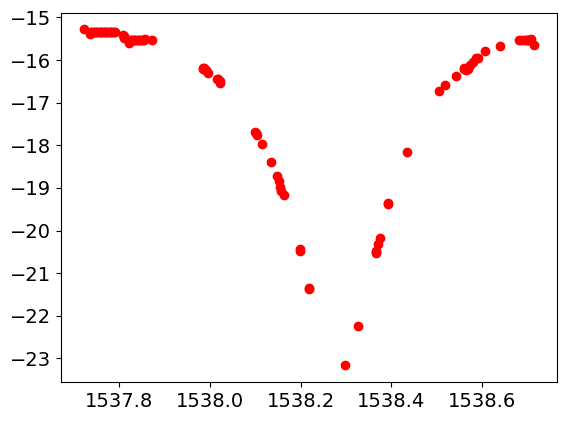

In [240]:

plt.plot(masked_values[0][0], masked_values[0][1], 'ro', label='data')
plt.show()

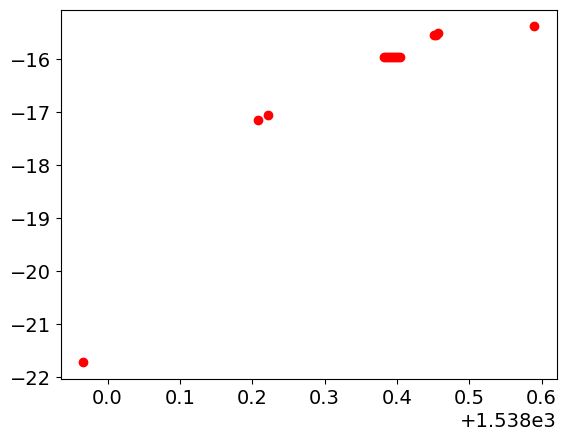

In [241]:
plt.plot(masked_values[311][0], masked_values[311][1], 'ro', label='data')
plt.show()

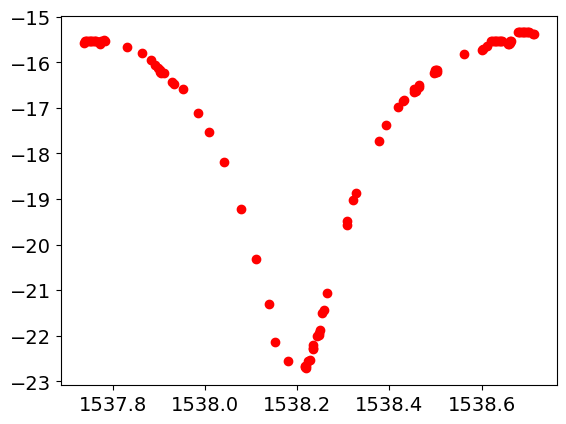

In [242]:
plt.plot(masked_values[243][0], masked_values[243][1], 'ro', label='data')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


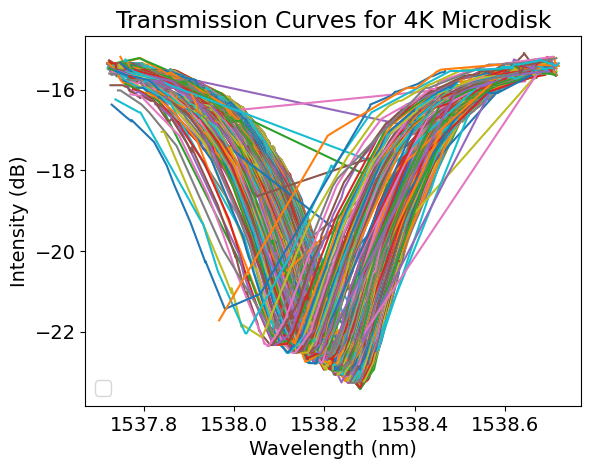

In [243]:
#This is everything, but we should clean up some noise.

for i in range(len(voltages)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.show()

In [244]:
# set a threshold for the number of points in an array and mask the smaller ones 

threshold = 24
check = []
for i in range(len(real_values)):
    new_values = real_values[i][0][real_values[i][0] != 0]
    if len(new_values) < threshold:
        check.append(i)

print(len(check))
print(check)

32
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 136, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 311]


In [245]:
#masks all arrays in the index: check
print(len(masked_values) - len(check))
masked_voltages = np.ma.array(voltages)
for i in check:
    masked_values[i][0] = np.ma.masked_greater(masked_values[i][0], 0)
    masked_values[i][1] = np.ma.masked_less(masked_values[i][1], 0)
    masked_voltages[i] = np.ma.masked

print(masked_values[0][0])
print(masked_values[0][1])
print(masked_voltages)

280
[1537.7227700831024 1537.7366204986145 1537.7393905817169
 1537.7421606648193 1537.7449307479217 1537.747700831024
 1537.7504709141265 1537.7532409972289 1537.7560110803313
 1537.7587811634337 1537.761551246536 1537.7643213296385 1537.767091412741
 1537.7698614958433 1537.7726315789457 1537.7754016620481
 1537.7781717451505 1537.780941828253 1537.7837119113553
 1537.7864819944577 1537.7892520775601 1537.7920221606626
 1537.808642659277 1537.8114127423794 1537.8114127423794 1537.822493074789
 1537.822493074789 1537.8252631578914 1537.8280332409938
 1537.8308033240962 1537.8335734071986 1537.836343490301
 1537.8391135734034 1537.8418836565058 1537.8446537396082
 1537.8474238227107 1537.850193905813 1537.8529639889155
 1537.8557340720179 1537.8585041551203 1537.8723545706323
 1537.985927977831 1537.985927977831 1537.9886980609333 1537.9886980609333
 1537.9914681440357 1537.9970083102405 1538.0163988919574
 1538.0191689750598 1538.0219390581622 1538.0219390581622
 1538.0995013850295 15

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


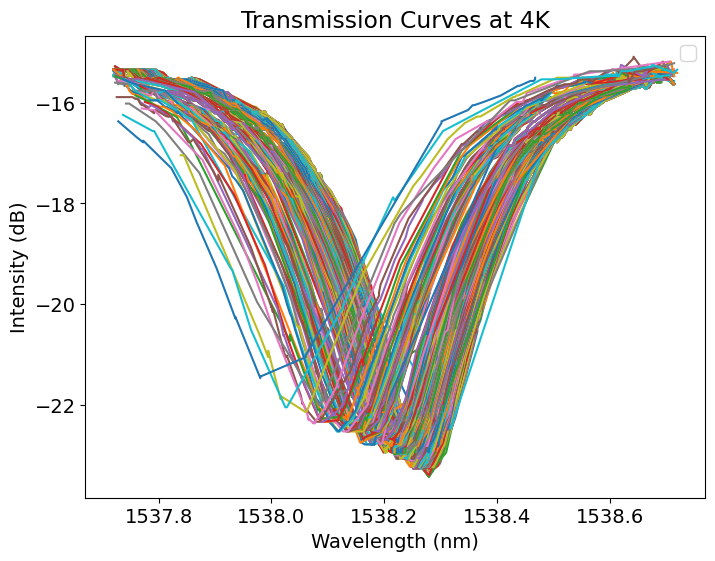

In [246]:
#nope! now we can re plot

plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves at 4K")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.savefig("figures/Gehl-4K-Cleaned.png")
plt.show()

In [247]:
#find the lowest value on the graph

#should be 15.142857142857174
test = masked_values[1][1]
lowest =  15.142857142857174
print(test[0])
print(test[0]+lowest)


-15.282051282051514
-0.13919413919433943


In [248]:
#i assume the top of the graph is 0 because there is around 15db of loss so I get rid of that and reposition the curve

#add the lowest value to each y value so the top is 0
        
for i in range(0,len(masked_values)):
    masked_values[i][1] = masked_values[i][1] + lowest


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


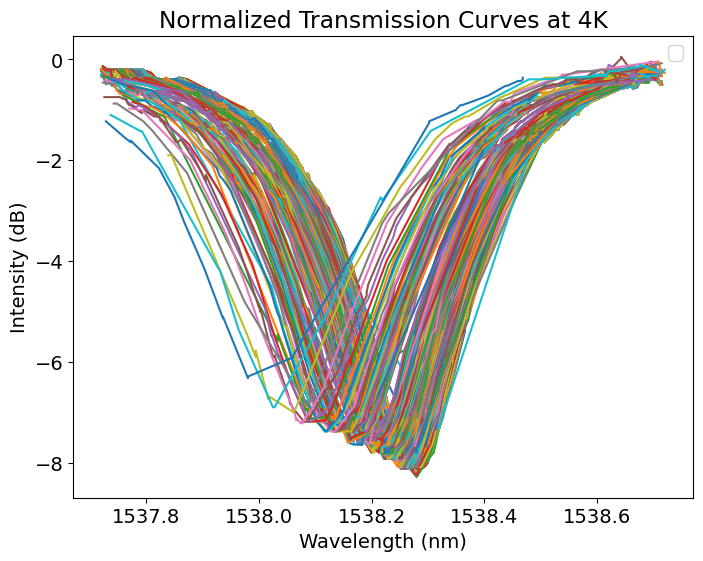

In [249]:
#lets regraph
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Normalized Transmission Curves at 4K")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (dB)')
plt.savefig("figures/Gehl-4K-Db.png")
plt.show()


In [250]:
print(masked_values[10][0])

[1537.7393905817169 1537.7421606648193 1537.7449307479217
 1537.747700831024 1537.7504709141265 1537.7532409972289
 1537.7560110803313 1537.7587811634337 1537.761551246536
 1537.7643213296385 1537.767091412741 1537.7698614958433
 1537.7726315789457 1537.7754016620481 1537.7781717451505
 1537.780941828253 1537.7837119113553 1537.7864819944577
 1537.7892520775601 1537.7920221606626 1537.8169529085842
 1537.8197229916866 1537.8197229916866 1537.822493074789 1537.822493074789
 1537.8252631578914 1537.8280332409938 1537.8308033240962
 1537.8335734071986 1537.836343490301 1537.8391135734034
 1537.8418836565058 1537.8446537396082 1537.8474238227107
 1537.850193905813 1537.8557340720179 1537.8585041551203
 1537.8585041551203 1537.8612742382227 1537.8668144044275 1537.93883656509
 1537.9416066481924 1537.9443767312948 1537.9471468143972
 1537.9499168974996 1537.9776177285237 1537.9776177285237
 1537.980387811626 1537.9831578947285 1537.985927977831 1537.999778393343
 1538.0025484764453 1538.005

In [251]:
#sick, I did it. Now I need to convert from dB to a fraction. I can check the binary code for this.

def dB2Frac(dB):
    return 10**(dB/10)

In [252]:
#run all values through dB2Frac

for i in range(0,len(masked_values)):
    masked_values[i][1] = dB2Frac(masked_values[i][1])

In [253]:
print(masked_values[10][0])

[1537.7393905817169 1537.7421606648193 1537.7449307479217
 1537.747700831024 1537.7504709141265 1537.7532409972289
 1537.7560110803313 1537.7587811634337 1537.761551246536
 1537.7643213296385 1537.767091412741 1537.7698614958433
 1537.7726315789457 1537.7754016620481 1537.7781717451505
 1537.780941828253 1537.7837119113553 1537.7864819944577
 1537.7892520775601 1537.7920221606626 1537.8169529085842
 1537.8197229916866 1537.8197229916866 1537.822493074789 1537.822493074789
 1537.8252631578914 1537.8280332409938 1537.8308033240962
 1537.8335734071986 1537.836343490301 1537.8391135734034
 1537.8418836565058 1537.8446537396082 1537.8474238227107
 1537.850193905813 1537.8557340720179 1537.8585041551203
 1537.8585041551203 1537.8612742382227 1537.8668144044275 1537.93883656509
 1537.9416066481924 1537.9443767312948 1537.9471468143972
 1537.9499168974996 1537.9776177285237 1537.9776177285237
 1537.980387811626 1537.9831578947285 1537.985927977831 1537.999778393343
 1538.0025484764453 1538.005

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


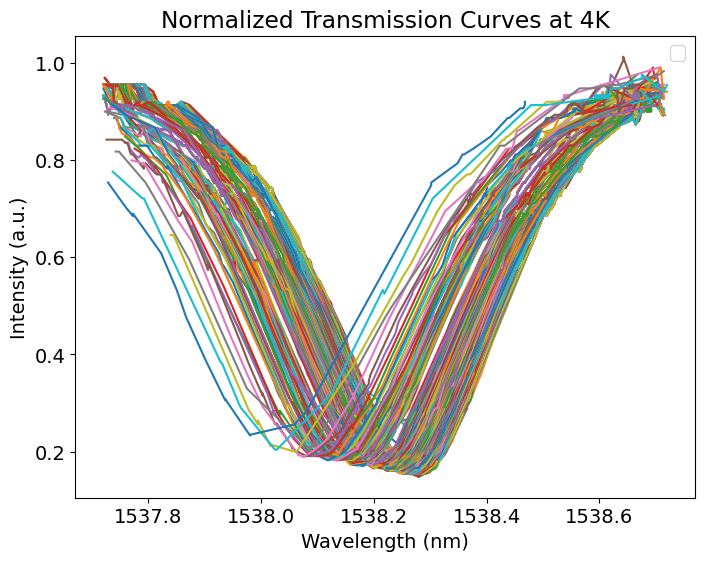

In [254]:
#lets regraph again
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 14})
for i in range(len(masked_values)):
    plt.plot(masked_values[i][0], masked_values[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Normalized Transmission Curves at 4K")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Norm.png")
plt.show()


In [255]:
normalized_values = np.ma.getdata(masked_values)
data_mask = np.ma.getmask(masked_values)


In [256]:
print(data_mask[10][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [257]:
# Reshape the data and the mask to 2D array
data_reshaped = normalized_values.reshape(normalized_values.shape[0], -1)
mask_reshaped = data_mask.reshape(data_mask.shape[0], -1)

# # Save the 2D array to a CSV file
np.savetxt("data/normalized_data.csv", data_reshaped, delimiter=",")
np.savetxt("data/cleaning_mask.csv", mask_reshaped, delimiter=",")
 
# # Load the 2D array from the CSV file
loaded_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
loaded_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
load_original_arr = loaded_data.reshape(312,2,144)
load_original_mask = loaded_mask.reshape(312,2,144)
 
# Verify if the loaded array matches the original
if np.array_equal(load_original_arr,normalized_values):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [258]:
# Verify if the loaded array matches the original
if np.array_equal(load_original_mask,data_mask):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [259]:
print(normalized_values.shape[0],normalized_values.shape[1],normalized_values.shape[2])
print(data_mask.shape[0],data_mask.shape[1],data_mask.shape[2])

312 2 144
312 2 144


In [260]:
clean_data = np.ma.masked_array(load_original_arr, load_original_mask)
if np.array_equal(masked_values,clean_data):
    print("Yes, both the arrays are the same")
else:
    print("No, both the arrays are not the same")

Yes, both the arrays are the same


In [261]:
i = 1
j = 1
print(masked_values[i][j])
print(clean_data[i][j])

[0.9684575429956832 0.9472512814506461 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9542679319670628 0.9542679319670628
 0.9542679319670628 0.9402862237655718 0.9265093722481241
 0.9333723795541623 0.8995582771959291 0.9062216474904169
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9129343759030023 0.9129343759030023 0.9129343759030023
 0.9196968280480387 0.9129343759030023 0.8052901387833526
 0.8052901387833526 0.7818651722098552 0.7876567449126682
 0.7818651722098552 0.7876567449126682 0.7761161844459621
 0.7647447135436454 0.7424991668900086 0.7424991668900086
 0.71033825074

In [262]:
volt_mask = np.ma.getmask(masked_voltages)
np.savetxt("data/voltage_mask.csv", volt_mask, delimiter = ",")

In [263]:
print(masked_values[10][0])

[1537.7393905817169 1537.7421606648193 1537.7449307479217
 1537.747700831024 1537.7504709141265 1537.7532409972289
 1537.7560110803313 1537.7587811634337 1537.761551246536
 1537.7643213296385 1537.767091412741 1537.7698614958433
 1537.7726315789457 1537.7754016620481 1537.7781717451505
 1537.780941828253 1537.7837119113553 1537.7864819944577
 1537.7892520775601 1537.7920221606626 1537.8169529085842
 1537.8197229916866 1537.8197229916866 1537.822493074789 1537.822493074789
 1537.8252631578914 1537.8280332409938 1537.8308033240962
 1537.8335734071986 1537.836343490301 1537.8391135734034
 1537.8418836565058 1537.8446537396082 1537.8474238227107
 1537.850193905813 1537.8557340720179 1537.8585041551203
 1537.8585041551203 1537.8612742382227 1537.8668144044275 1537.93883656509
 1537.9416066481924 1537.9443767312948 1537.9471468143972
 1537.9499168974996 1537.9776177285237 1537.9776177285237
 1537.980387811626 1537.9831578947285 1537.985927977831 1537.999778393343
 1538.0025484764453 1538.005

In [264]:
print(clean_data[10][0])

[1537.7393905817169 1537.7421606648193 1537.7449307479217
 1537.747700831024 1537.7504709141265 1537.7532409972289
 1537.7560110803313 1537.7587811634337 1537.761551246536
 1537.7643213296385 1537.767091412741 1537.7698614958433
 1537.7726315789457 1537.7754016620481 1537.7781717451505
 1537.780941828253 1537.7837119113553 1537.7864819944577
 1537.7892520775601 1537.7920221606626 1537.8169529085842
 1537.8197229916866 1537.8197229916866 1537.822493074789 1537.822493074789
 1537.8252631578914 1537.8280332409938 1537.8308033240962
 1537.8335734071986 1537.836343490301 1537.8391135734034
 1537.8418836565058 1537.8446537396082 1537.8474238227107
 1537.850193905813 1537.8557340720179 1537.8585041551203
 1537.8585041551203 1537.8612742382227 1537.8668144044275 1537.93883656509
 1537.9416066481924 1537.9443767312948 1537.9471468143972
 1537.9499168974996 1537.9776177285237 1537.9776177285237
 1537.980387811626 1537.9831578947285 1537.985927977831 1537.999778393343
 1538.0025484764453 1538.005